# Sankey plot
In Python. Displays transition flows between the 5 categories during each 4 years time interval between 2002 and 2022.
- **Input**: Transition level data obtained from the intensity analysis (TIA_1).
- **Output**: Sankey plot.

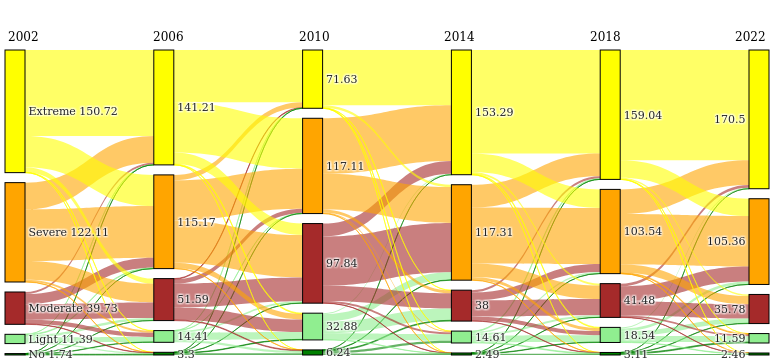

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [6]:
import plotly.graph_objects as go
import plotly
import csv
import pandas as pd
import plotly.io as pio
# pio.kaleido.scope.mathjax = None

data= pd.read_csv("TIA_.csv",sep="\t")
data_label= pd.read_csv("cross_tab.csv",sep="\t")

opacity = 0.6
node_label = data_label.labels
node_color = ["rgba(255, 255, 0, 1.0)","rgba(255, 165, 0, 1.0)","rgba(165,42,42, 1.0)","rgba(144, 238, 144, 1.0)","rgba(0, 128, 0, 1.0)"]*6
link_color = [node_color[src].replace("1.0", str(opacity))  for src in data.source]

fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node = dict(
      pad = 10,
      thickness = 20,
      line = dict(color = "black", width = 1),
      label = node_label,
      color = node_color
    ),
    link = dict(
      source = data.source, 
      target = data.target,
      value = data.transition_km2,
      label = data.transition_km2,
      color = link_color,
  ))])

for x_coordinate, column_name in enumerate(["2002","2006","2010","2014",'2018','2022']):
    fig.add_annotation(
          x=x_coordinate,
          y=1.08,#y value above 1 means above all nodes
          xref="x",
          yref="paper",
          text=column_name,
          showarrow=False,
          font=dict(
              family="Tahoma",
              size=12,
              color="black"
              ),
          align="left",
          )

fig.update_layout(font_family="Serif", font_size=11,
                  margin_l=5, margin_t=50, margin_b=5, margin_r=5)
fig.update_layout(template='simple_white')
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

pio.write_image(fig, "sankey.pdf", width=600, height=300)